In [1]:
import numpy as np
import pandas as pd

In [2]:
fake_data = pd.read_csv("./archive/Fake.csv")
true_data = pd.read_csv("./archive/True.csv")

In [3]:
fake_data.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# 1. *Data Preprocessing*


In [5]:
#Creating labels for classification 
fake_data["Label"] = 0
true_data["Label"] = 1

In [6]:
#TSample of the data due to CPU Power
data = pd.concat([fake_data.iloc[:2000,:],true_data.iloc[:2000,:]], axis=0,ignore_index = True)

In [7]:
data.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
data.shape

(4000, 5)

In [9]:
data.subject.unique()

array(['News', 'politicsNews'], dtype=object)

In [10]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [11]:
#Dropping unnecessary variables
data.drop(["title","subject","date"], axis=1, inplace=True)

In [12]:
data.head()

,text,Label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [13]:
data.text[7]

'In the wake of yet another court decision that derailed Donald Trump s plan to bar Muslims from entering the United States, the New York Times published a report on Saturday morning detailing the president s frustration at not getting his way   and how far back that frustration goes.According to the article, back in June, Trump stomped into the Oval Office, furious about the state of the travel ban, which he thought would be implemented and fully in place by then. Instead, he fumed, visas had already been issued to immigrants at such a rate that his  friends were calling to say he looked like a fool  after making his broad pronouncements.It was then that Trump began reading from a document that a top advisor, noted white supremacist Stephen Miller, had handed him just before the meeting with his Cabinet. The page listed how many visas had been issued this year, and included 2,500 from Afghanistan (a country not on the travel ban), 15,000 from Haiti (also not included), and 40,000 from

In [14]:
#Creating independent and dependent variables
X = data.drop(["Label"],axis=1)
y = data["Label"]

In [15]:
X.head()

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [17]:
X.columns

Index(['text'], dtype='object')

# 2.*Stemming and removing stop words*

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [19]:
ps = PorterStemmer()
corpus=[]
for i in range(0,len(X)):
    review = re.sub("[^a-zA-Z]"," ",X["text"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

# 3.*Word Vectorization*

In [20]:
vector = TfidfVectorizer(max_features =5000, ngram_range=(1,3))
X = vector.fit_transform(corpus).toarray()

In [21]:
X.shape

(4000, 5000)

In [22]:
y.shape

(4000,)

# 4.*Model Building*

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
X_train.shape

(2800, 5000)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)

# 5.*Model Evaluation*

In [26]:
print("Accuracy of the model: {}%".format(score*100))

Accuracy of the model: 98.08333333333333%


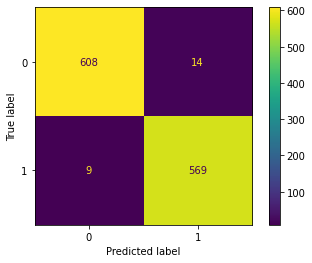

In [28]:
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, pred)
metrics.plot_confusion_matrix(classifier,X_test,y_test)

# *We see that the model has successfully classified the fake and real news with an accuracy of 98%*